<a href="https://colab.research.google.com/github/Elise643/Wellnamed/blob/main/Unit2_Project_Elise_Howell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I decided to use comic books written by Brian Michael Bendis for my data set. He's certainly not my favorite comic writer (not that he's bad) and I've only read a few of his comics, but I knew it would be a large data set considering he's one of the most well-known authors and he's been writing professionally for over thirty years. He's written for Marvel Comics and DC as well as other companies and has won five Eisner Awards (awards for Amerian comic books). Initially, after looking through Amazon, I decided to use it to collect the data. When I tried to write the web scraping code myself, it kept giving errors and was essentially a waste of time, so I switched to using Octoparse. Octoparse is a paid program that will do web scraping locally on the device it's installed on (or you could use their cloud but it's an additional cost.) (For the record, I got a free trial; it's far more expensive than I would spend for a one time usage.) I set it up to run, copying the data for each product listed in the Amazon search. (Filtered by author (Brian Michael Bendis or Brian Bendis), by genre (Comics & Graphic Novels), and language (English), and set the sort method to Most reviews.

When I looked on Amazon, I would have estimated the average rating around 4-4.5. I don't know if this is accurate, as I was never actually able to get the data I needed from the site. After allowing the web scraper to run for around an hour and a half while I worked on other things, it had collected 2686 lines of data (it wasn't finished but I told it to stop running because there was enough data). However, when I looked at this data, it had taken in every piece of information about the product except the one thing I was actually looking for: the rating. Additionally, despite claiming there were no duplicates, I found that in reality nearly everything was a duplicate; there were only 95 actual entries and none of them included a rating I tried to manually select the rating in order to run the program again, but for some reason it wasn't recognizing it as an element on the page. At this point I gave up on using Amazon as, like trying to collect the data without the use of the program, it was a waste of time.

I switched over to Goodreads, which I honestly should have done in the first place. Books rated by people who have a Goodreads account (so they presumably enjoy reading and have read more texts) likely have a less biased opinion. Amazon reviews help the product; Goodreads reviews help the reader. This worked amazingly. I was able to select the information I needed after going to his author profile on the site which lists every work he's credited for. It was also significantly faster, taking just 23 minutes.

<a href="https://ibb.co/YXbP787"><img src="https://i.ibb.co/C6Wm5v5/Screenshot-2024-09-13-100903.png" alt="Screenshot-2024-09-13-100903" border="0"></a>

I exported the data and brought it into <a href="https://docs.google.com/spreadsheets/d/1xiCLV8d8uin5PsZLhFn-QXn94us5WXjM/edit?usp=sharing&ouid=112561048089299476925&rtpof=true&sd=true">Google Sheets</a>  and started by parsing the ratings from a "#.## avg rating — ##### ratings" format to two separate attributes, the number of reviews the product has and its average rating. This also included sorting out any products with zero reviews or reviews formatted in a way that gave no indication of the actual five point score.
Then came the filtering. I chose to exclude any comic that contained the word omnibus, because that would mean it contains other comics within one collection which would lead to overlapping data. I also filtered by language (using the DETECTLANGUAGE() function I was unaware existed) to only include English so that I wouldn't end up with the same comic in various languages creating similar overlap.

This left me with 1750 lines of data. I considered manually checking the remainder for any the filters failed to recognize but realized that would take quite a bit of time to remove what is likely less than five data entries, so I decided against it.  (This flitered data can be found in the Filtered Data tab, or in the Simplified Data tab where I removed irrelevant information such as the number of editions published.) I apologize for such a long intro.

Looking briefly over the data, most values appear to be around 3.80 to 4.20. I'll be using the data to calculate the likelihood of a comic written by Brian Michael Bendis to receive a Goodreads rating greater than or equal to 4.10.

This does appear to be on the higher end when looking through the data, but it doesn't seem to be lacking in quantity. Judging by the success he has as a comic writer and the data I've skimmed through, I'm guessing that the probability will be somewhere close to 53%. I do think it's more than half, but not by much. It also depends on how many people reviewed the different books, 30,393 being the highest, for House of M (one of the few I've read), and the 64 comics that only received two reviews.

Imports and prior:

In [46]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

<Axes: >

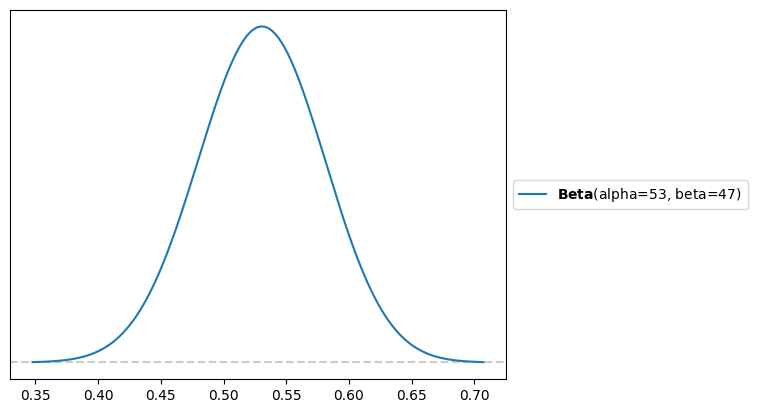

In [47]:
pz.Beta(alpha=53, beta=47).plot_pdf()

For my prior, I used by guess of 53%. Alpha represents the hypothetical 53 comics that "succeed" by getting a review of 4.10 or higher, and the beta value represents the remaining 47 that don't.

In [48]:
BMB_prior = pz.Beta(alpha=53, beta=47)
BMB_prior_mode = (BMB_prior.alpha-1)/(BMB_prior.alpha + BMB_prior.beta-2)
BMB_prior.mean(), BMB_prior.median(), BMB_prior_mode

(0.53, 0.5302007924474924, 0.5306122448979592)

As expected, the mean, median, and mode all round to .53 or 53%.

The prior I made before was entirely arbitrary and used nothing other than a complete guess based on what I'd seen of the data. Now we can look at the actual data.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/hZVt0Y3/Screenshot-2024-09-13-112833.png" alt="Screenshot-2024-09-13-112833" border="0"></a>

Some data that isn't relevant but I find interesting nonetheless:

Most well rated: <em>Sam & Twitch #5</em> and <em>Sam & Twitch #6</em> with an average of 4.8 stars and five reviews each

Most poorly rated: <em>Daredevil: Ninja #3</em> with an average of 2.3 stars and ten reviews.

Number of comics with "avenger" in the title: 292  (the average of their averages is 3.65 stars)


Now that we have actual values in place of the randomness from the prior, here's a more accurate Beta distribution graph.


<Axes: >

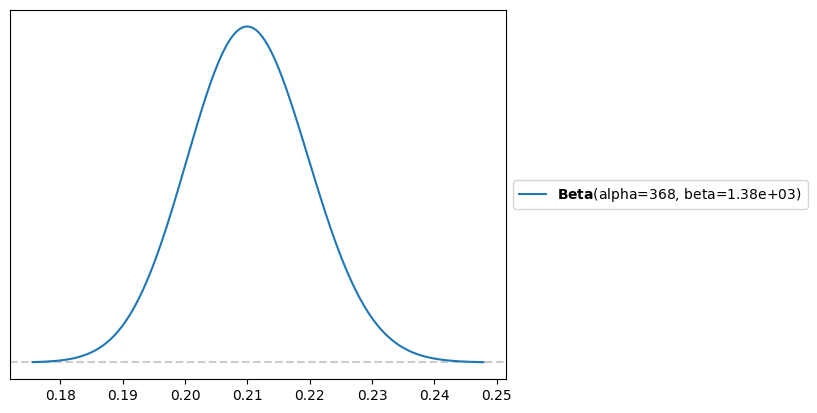

In [49]:
pz.Beta(alpha=368, beta=1382).plot_pdf()

We can already see the prior was highly inaccurate and a greatly overestimated the success of his comics.

Here's a Binomial distribution graph for the same new values.

<Axes: >

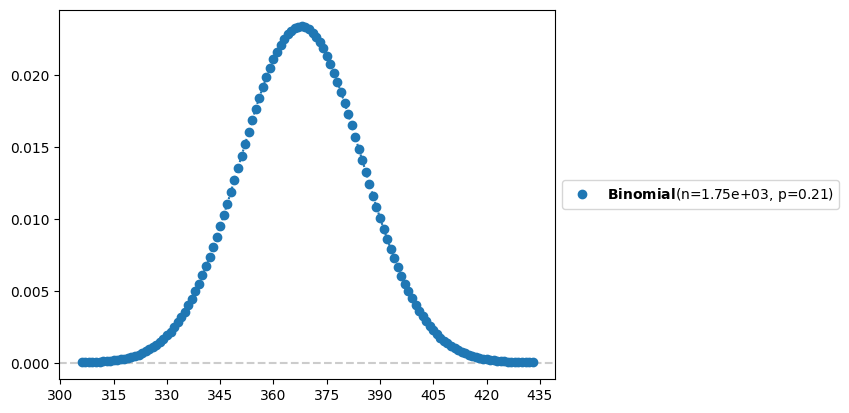

In [50]:
pz.Binomial(n=1750,p=368/1750).plot_pdf()

This graph represents the likelihood of having different numbers of successful comics.

Combining my highly inaccurate prior with the true data can be used to calculate a posterior.

In [51]:
#prior
alpha_prior = 53
beta_prior = 47

#actual data
k = 368
n = 1750

analytic_BMB = pz.Beta(alpha=alpha_prior + k, beta = beta_prior + n - k)
analytic_BMB_mode = (alpha_prior + k - 1)/(alpha_prior + k + beta_prior + n - k - 2)
analytic_BMB.mean(),analytic_BMB.median(), analytic_BMB_mode

(0.22756756756756757, 0.22746937846063855, 0.22727272727272727)

Since the prior had significantly less "data" than the actual data, the effect it had was minimal.

Beta distribution posterior graph:

<Axes: >

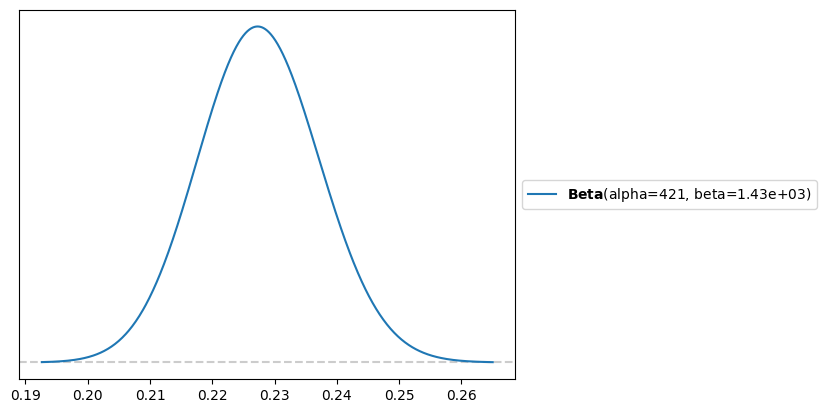

In [52]:
analytic_BMB.plot_pdf()

In [53]:
BMB_data = np.repeat([1,0],repeats=[368,1382])


In [60]:
with pm.Model() as wmby_BMB_model:
  θ = pm.Beta('θ' , alpha = 53. , beta = 47.)
  y = pm.Bernoulli('y', p = θ, observed = BMB_data)
  idata = pm.sample(1000)

<Axes: title={'center': 'θ'}>

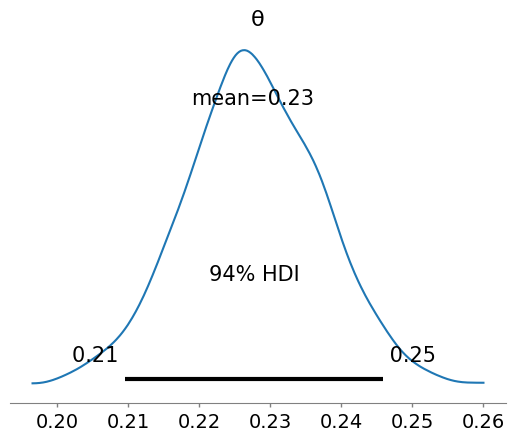

In [55]:
az.plot_posterior(idata)

The data gives the expected mean, so we can use this to predict the success of his future comics.

In [63]:
pm.sample_posterior_predictive(idata, model=wmby_BMB_model, extend_inferencedata=True)
stacked = az.extract(idata, group="posterior_predictive")


array([0, 1, 0, ..., 0, 1, 0])

It creates a 1750 length array of all predicted comics. This is ridiculously large, so I'll look just at the first 100 values.

---



In [67]:
stacked.sel(sample=0).sel(draw=0).y.to_series().values[0:99]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

For the final predicted percentage, I'm going to go with the 23% value.

Things that could be better:

This doesn't account for the actual ratings given. A rating of 0.0 is treated the same as a rating of 4.0. If I were to replicate this with more accuracy, I would incorporate the distance from the desired value as well as the number of ratings given. Comics that received thousands of ratings were treated the same as those with only two. (I didn't include those which only had one review in my data set).